## 1. Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("consumo_energia_industrial.csv")
df.head()

,Data,Tipo_de_uso,Consumo_kWh,Gasto_R$,Impacto_ambiental_kgCO2,Desperdicio_kWh
0,2025-01,Automobilística,4210,3365,974,505
1,2025-02,Têxtil,3125,2500,728,292
2,2025-03,Química,3820,3060,892,445
3,2025-04,Alimentícia,2530,2025,590,225
4,2025-05,Eletrônica,3320,2690,772,305


## 2. Cálculo medidas de tendência central, posição e dispersão

In [20]:
df[["Gasto_R$", "Impacto_ambiental_kgCO2", "Desperdicio_kWh", "Consumo_kWh"]].describe()

,Gasto_R$,Impacto_ambiental_kgCO2,Desperdicio_kWh,Consumo_kWh
count,108.000000,108.000000,108.000000,108.000000
mean,2860.925926,835.601852,377.064815,3580.324074
std,466.627465,134.548254,104.496771,585.333707
min,2025.000000,590.000000,225.000000,2530.000000
25%,2600.000000,766.750000,310.000000,3248.750000
50%,2825.000000,821.500000,330.000000,3530.000000
75%,3192.500000,938.500000,466.250000,4008.750000
max,3580.000000,1035.000000,540.000000,4470.000000


## 3. Gráfico Boxplot

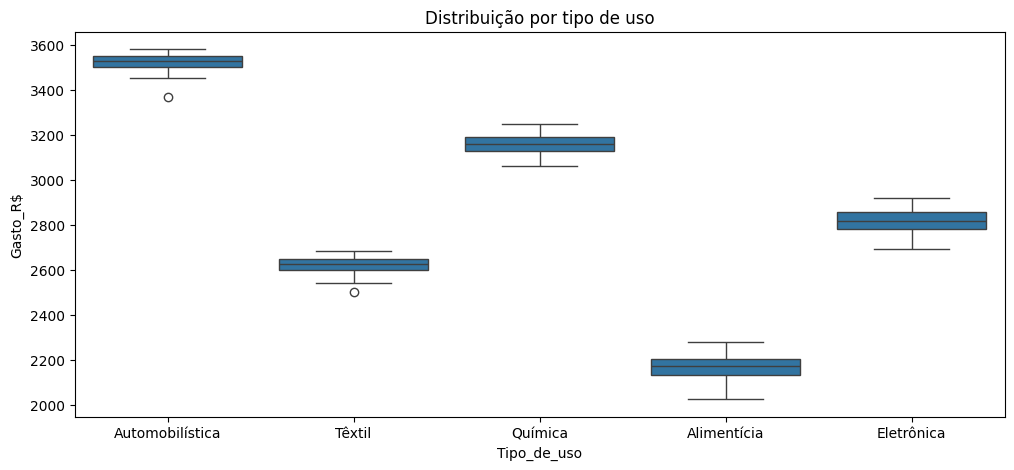

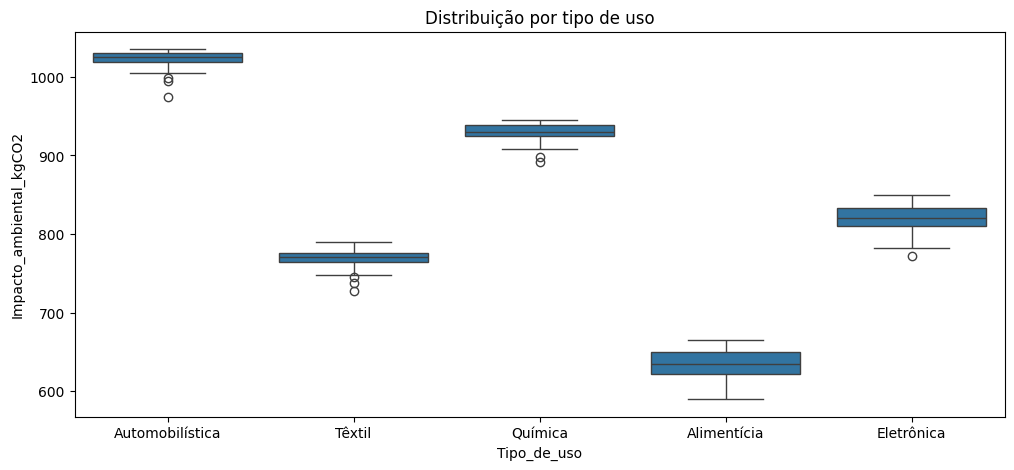

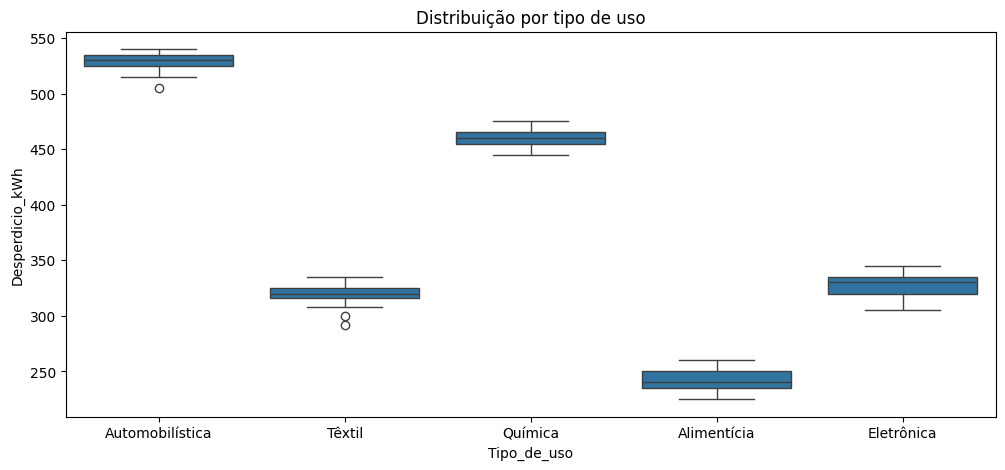

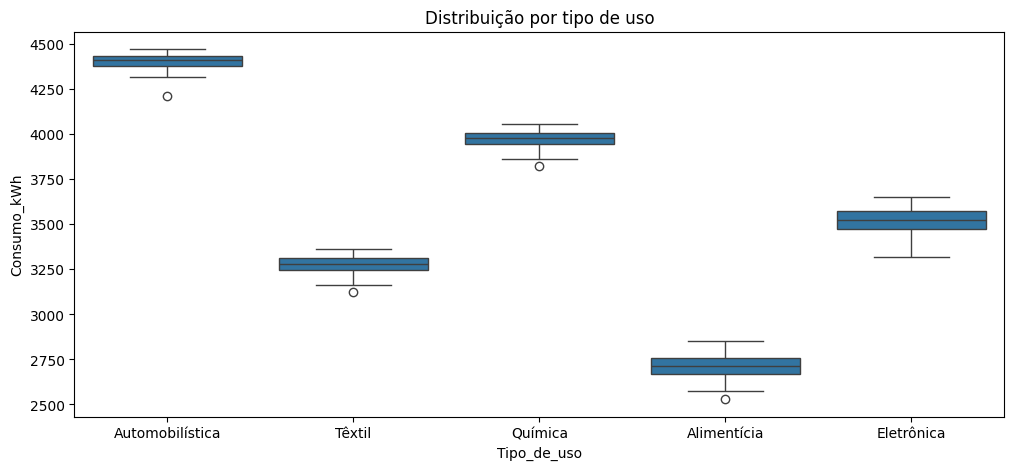

In [3]:
# Boxplot
atributos_numericos = ["Gasto_R$", "Impacto_ambiental_kgCO2", "Desperdicio_kWh", "Consumo_kWh"]
for atributo_numerico in atributos_numericos:
  plt.figure(figsize=(12,5))
  sns.boxplot(x=df["Tipo_de_uso"], y=df[atributo_numerico], data=df[["Tipo_de_uso", atributo_numerico]])
  plt.title("Distribuição por tipo de uso")
  plt.show()

## 4. Correlação

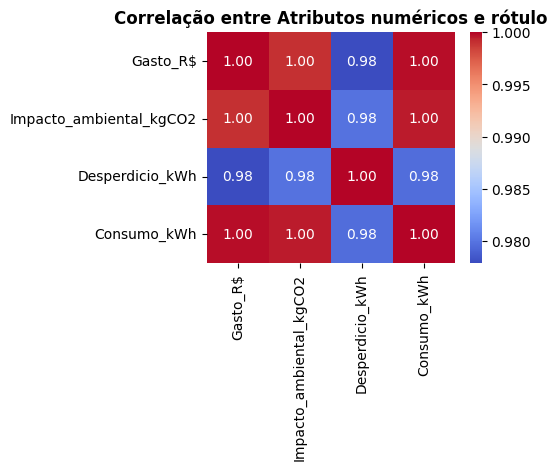

In [4]:
# Correlação
plt.figure(figsize=(4,3))
matriz_corr = df[["Gasto_R$", "Impacto_ambiental_kgCO2", "Desperdicio_kWh"] + ["Consumo_kWh"]].corr()
sns.heatmap(matriz_corr,annot=True,cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Atributos numéricos e rótulo", fontweight="bold")
plt.show()

## 5. Estimativa de redções após a solução

In [21]:
reducoes = {
    "digitalizacao_desperdicio": 0.12,
    "equipamento_consumo": 0.08,
    "iluminacao_consumo": 0.04,
    "treinamento_consumo": 0.02,
    "treinamento_desperdicio": 0.02
}

# Calculo do consumo de energia reduzido
df["Consumo_reduzido"] = df["Consumo_kWh"] * (1 - reducoes["equipamento_consumo"]
                                              - reducoes["iluminacao_consumo"]
                                              - reducoes["treinamento_consumo"])

# Calculo do desperdicio de energia reduzido
df["Desperdicio_reduzido"] = df["Desperdicio_kWh"] * (1 - reducoes["digitalizacao_desperdicio"]
                                                      - reducoes["treinamento_desperdicio"])

# Calculo do custo por KWh
df["Custo_por_kWh"] = df["Gasto_R$"] / df["Consumo_kWh"]

# Calculo do gasto reduzido
df["Gasto_reduzido"] = df["Consumo_reduzido"] * df["Custo_por_kWh"]


# Calculo do impacto reduzido
df["Impacto_reduzido"] = df["Impacto_ambiental_kgCO2"] * (df["Consumo_reduzido"] / df["Consumo_kWh"])

In [9]:
atributos_numericos_reduzido = ["Gasto_reduzido", "Impacto_reduzido", "Desperdicio_reduzido", "Consumo_reduzido"]
df[atributos_numericos_reduzido].describe()

,Gasto_reduzido,Impacto_reduzido,Desperdicio_reduzido,Consumo_reduzido
count,108.000000,108.000000,108.000000,108.000000
mean,2460.396296,718.617593,324.275741,3079.078704
std,401.299620,115.711498,89.867223,503.386988
min,1741.500000,507.400000,193.500000,2175.800000
25%,2236.000000,659.405000,266.600000,2793.925000
50%,2429.500000,706.490000,283.800000,3035.800000
75%,2745.550000,807.110000,400.975000,3447.525000
max,3078.800000,890.100000,464.400000,3844.200000


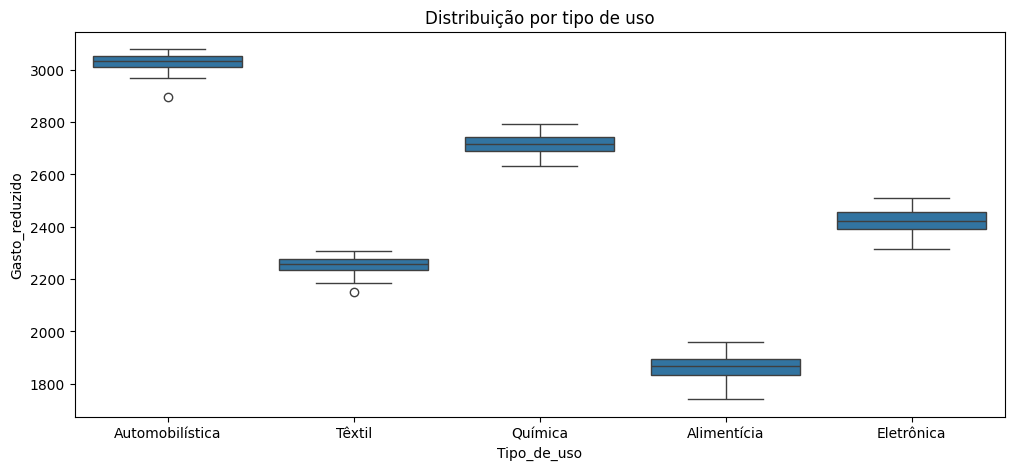

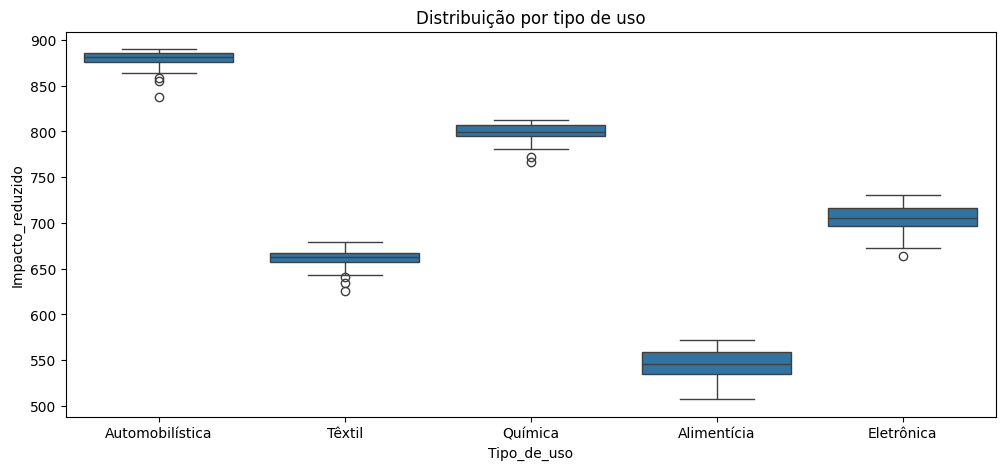

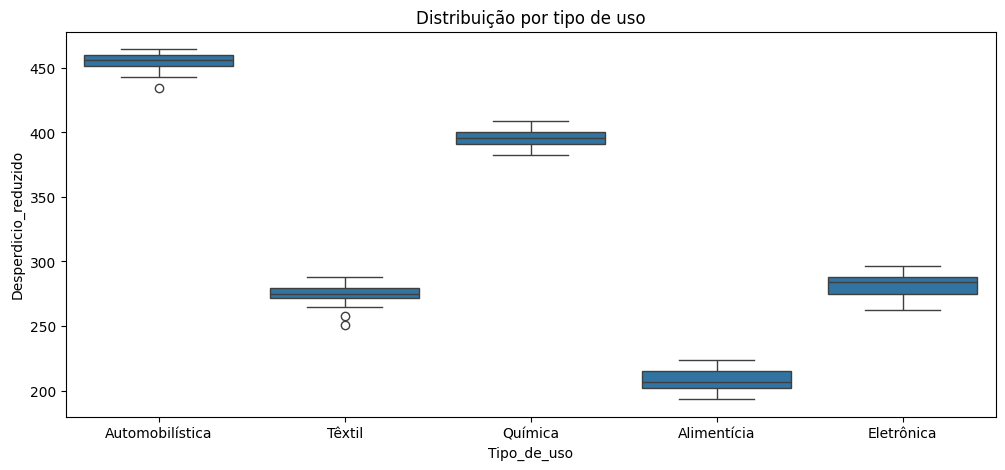

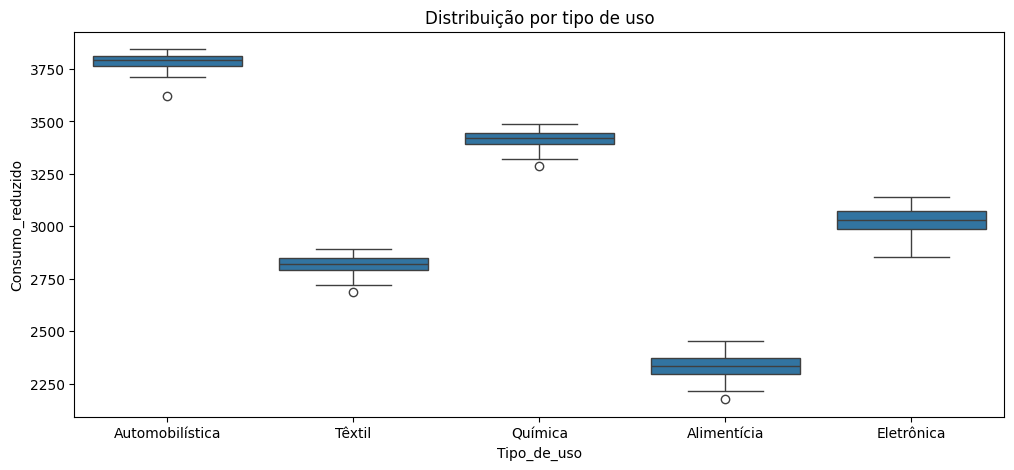

In [10]:
# Boxplot atributos_reduzidos
for atributo_reduzido in atributos_numericos_reduzido:
  plt.figure(figsize=(12,5))
  sns.boxplot(x=df["Tipo_de_uso"], y=df[atributo_reduzido], data=df[["Tipo_de_uso", atributo_numerico]])
  plt.title("Distribuição por tipo de uso")
  plt.show()

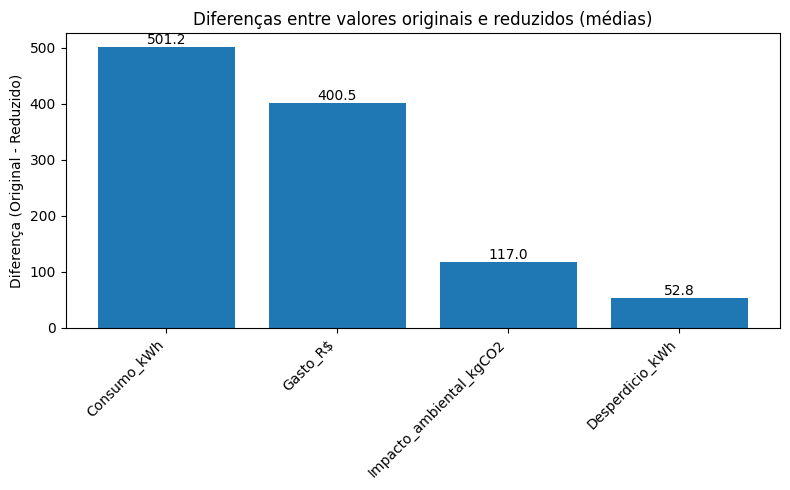

In [19]:
# Gráfico da difereça entre original e reduzido
orig = {
    "Consumo_kWh": 3580.324074,
    "Gasto_R$": 2860.925926,
    "Impacto_ambiental_kgCO2": 835.601852,
    "Desperdicio_kWh": 377.064815,
}

red = {
    "Consumo_reduzido": 3079.078704,
    "Gasto_reduzido": 2460.396296,
    "Impacto_reduzido": 718.617593,
    "Desperdicio_reduzido": 324.275741,
}

pares = [
    ("Consumo_kWh", "Consumo_reduzido"),
    ("Gasto_R$", "Gasto_reduzido"),
    ("Impacto_ambiental_kgCO2", "Impacto_reduzido"),
    ("Desperdicio_kWh", "Desperdicio_reduzido"),
]

labels = [p[0] for p in pares]
diffs = [orig[p[0]] - red[p[1]] for p in pares]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, diffs)
plt.ylabel("Diferença (Original - Reduzido)")
plt.title("Diferenças entre valores originais e reduzidos (médias)")
plt.xticks(rotation=45, ha='right')


for bar, valor in zip(bars, diffs):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{valor:.1f}",
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()